In [1]:
%matplotlib inline
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
quandl.ApiConfig.api_key = 'eUfCeeauDQJgs_-zDXGG'
def get_data(code_list):
    all_data=[]
    for each_code in code_list: 
        ary=quandl.get(f'ZILLOW/{each_code}', returns='numpy')
#         all_data[each_code]=ary
        one_df=pd.DataFrame(ary)
        one_df=one_df.rename({'Value': each_code}, axis=1)#, columns=['Date', each_code])
        one_df=one_df.set_index('Date')
        all_data.append(one_df)
    df=pd.concat(all_data, axis=1)
    return df

In [3]:
df=get_data(['M9_MRPAH', 'M9_AOIP', 'M9_MLNSAH', 'M9_MTURNM', 'M9_NFS'])
df.head()

,M9_MRPAH,M9_AOIP,M9_MLNSAH,M9_MTURNM,M9_NFS
Date,,,,,
2008-03-31,NaN,NaN,NaN,0.0054,NaN
2008-04-30,NaN,NaN,NaN,0.0059,NaN
2008-05-31,NaN,NaN,NaN,0.0058,NaN
2008-06-30,NaN,NaN,NaN,0.0060,9939.0
2008-07-31,NaN,NaN,NaN,0.0064,10156.0


,M9_MRPAH,M9_AOIP,M9_MLNSAH,M9_MTURNM,M9_NFS
Date,,,,,
2013-01-31,1000.0,89.0,29387.0,0.0099,9154.0
2013-02-28,995.0,76.0,28317.0,0.0094,8114.0
2013-03-31,1025.0,57.0,30192.0,0.0107,9602.0
2013-04-30,1050.0,54.0,30667.0,0.0114,11422.0
2013-05-31,1095.0,56.0,32912.0,0.0121,10872.0


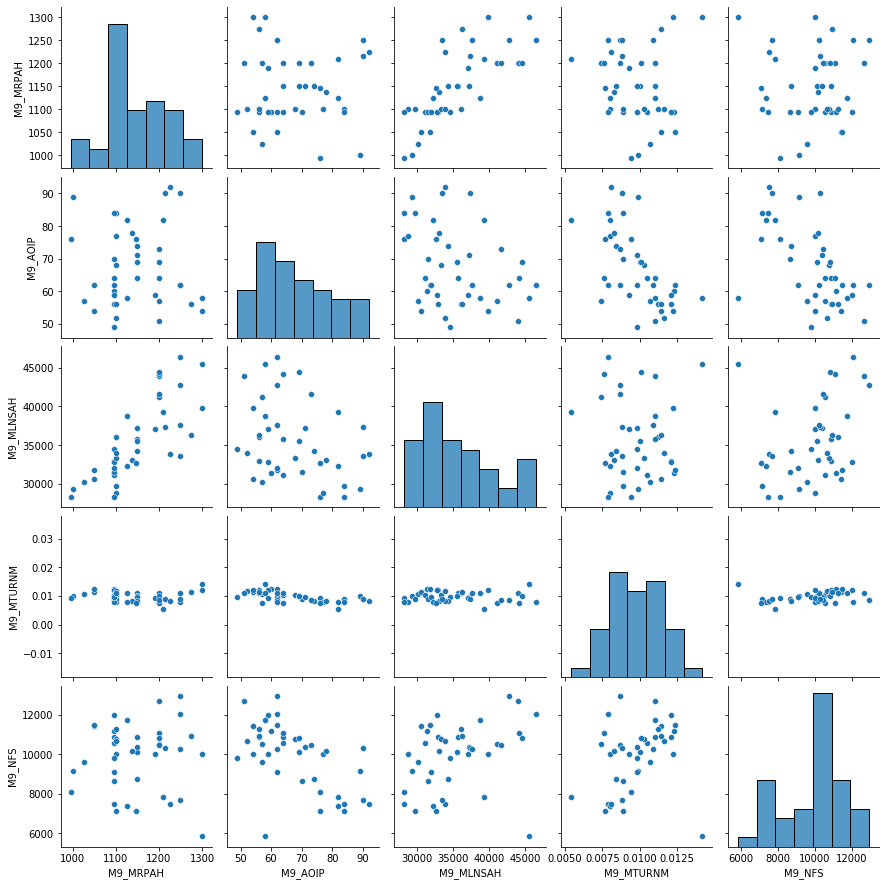

In [5]:
import seaborn as sns
drop_na_df=df.dropna()
sns.pairplot(drop_na_df)
drop_na_df.head()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
model = LinearRegression()

X=drop_na_df.drop('M9_MRPAH', axis=1)
Y=drop_na_df['M9_MRPAH']

poly=PolynomialFeatures()
poly.fit(X)
transformed_X=poly.transform(X)

display(X.head())
display(Y.head())
model.fit(transformed_X, Y)
print(model)


,M9_AOIP,M9_MLNSAH,M9_MTURNM,M9_NFS
Date,,,,
2013-01-31,89.0,29387.0,0.0099,9154.0
2013-02-28,76.0,28317.0,0.0094,8114.0
2013-03-31,57.0,30192.0,0.0107,9602.0
2013-04-30,54.0,30667.0,0.0114,11422.0
2013-05-31,56.0,32912.0,0.0121,10872.0


Date
2013-01-31    1000.0
2013-02-28     995.0
2013-03-31    1025.0
2013-04-30    1050.0
2013-05-31    1095.0
Freq: M, Name: M9_MRPAH, dtype: float64

LinearRegression()


In [8]:
model.score(transformed_X, Y) # R^2 value -> it measure how much of Y is being considered by X

0.8069879135502305

In [10]:
pd.concat([pd.DataFrame(transformed_X), Y.reset_index()], axis=1).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,M9_MRPAH
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,-0.313800,-0.608634,-0.587465,0.996864,0.698162,0.411779,0.450555,-0.305737,-0.641356,-0.531712,-0.606436,-0.719587,-0.596418,-0.032546
2,NaN,-0.313800,1.000000,-0.013926,0.321139,-0.316631,0.452974,-0.363687,0.030905,0.997725,0.579602,0.759280,0.020892,0.119104,0.359585,0.765899
3,NaN,-0.608634,-0.013926,1.000000,0.292177,-0.595755,-0.584774,0.462484,-0.326244,-0.018297,0.798087,0.125956,0.992911,0.787665,0.308285,-0.093426
4,NaN,-0.587465,0.321139,0.292177,1.000000,-0.591401,-0.290786,-0.273370,0.445375,0.310594,0.349531,0.851238,0.251730,0.804936,0.995074,0.000490
5,NaN,0.996864,-0.316631,-0.595755,-0.591401,1.000000,0.691546,0.418776,0.437095,-0.309289,-0.632177,-0.535904,-0.593607,-0.712512,-0.599609,-0.025582
6,NaN,0.698162,0.452974,-0.584774,-0.290786,0.691546,1.000000,0.102526,0.467170,0.455216,-0.177741,0.077982,-0.556168,-0.572372,-0.274703,0.539107
7,NaN,0.411779,-0.363687,0.462484,-0.273370,0.418776,0.102526,1.000000,0.181435,-0.358461,0.192582,-0.411432,0.444879,0.119572,-0.268975,-0.174886
8,NaN,0.450555,0.030905,-0.326244,0.445375,0.437095,0.467170,0.181435,1.000000,0.028311,-0.286555,0.348795,-0.366721,0.088305,0.425138,-0.026573
9,NaN,-0.305737,0.997725,-0.018297,0.310594,-0.309289,0.455216,-0.358461,0.028311,1.000000,0.576329,0.752942,0.017460,0.106680,0.351446,0.750762


In [11]:
results=model.predict(X)
results_df=pd.DataFrame(results, columns=['predicted'])
results_df['actual']=Y.to_list()
results_df

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 15 is different from 4)